In [1]:
import tensorflow as tf

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [2]:
import numpy as np

from tensorflow.keras.datasets import mnist

In [3]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print('x_train.shape = ', x_train.shape, 't_train.shape = ', t_train.shape)

x_train.shape =  (60000, 28, 28) t_train.shape =  (60000,)


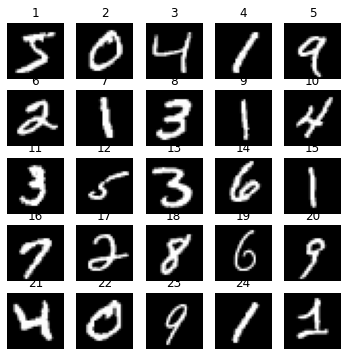

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))

for index in range(25):

  plt.title(index)
  plt.subplot(5, 5, index + 1)
  plt.imshow(x_train[index], cmap = 'gray')
  plt.axis('off')
plt.show()

# 정규화 합시다.

In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.max = ', x_train.max(), 'x_test.max = ', x_test.max())

x_train.max =  1.0 x_test.max =  1.0


# One hot encoding

In [11]:
t_train = to_categorical(t_train, 10)
t_test = to_categorical(t_test, 10)

print(t_train.shape, t_test.shape)

(60000, 10) (10000, 10)


# 모델 제작

In [12]:
model = Sequential()

model.add(Flatten(input_shape = (28, 28, 1)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(), metrics = ['accuracy'])

In [14]:
hist = model.fit(x_train, t_train, epochs = 30, verbose = 2, validation_split = 0.3)

Epoch 1/30
1313/1313 - 4s - loss: 0.7817 - accuracy: 0.8028 - val_loss: 0.4167 - val_accuracy: 0.8883 - 4s/epoch - 3ms/step
Epoch 2/30
1313/1313 - 3s - loss: 0.3798 - accuracy: 0.8961 - val_loss: 0.3380 - val_accuracy: 0.9059 - 3s/epoch - 3ms/step
Epoch 3/30
1313/1313 - 3s - loss: 0.3232 - accuracy: 0.9099 - val_loss: 0.3031 - val_accuracy: 0.9134 - 3s/epoch - 3ms/step
Epoch 4/30
1313/1313 - 3s - loss: 0.2920 - accuracy: 0.9175 - val_loss: 0.2800 - val_accuracy: 0.9202 - 3s/epoch - 2ms/step
Epoch 5/30
1313/1313 - 3s - loss: 0.2690 - accuracy: 0.9244 - val_loss: 0.2643 - val_accuracy: 0.9244 - 3s/epoch - 2ms/step
Epoch 6/30
1313/1313 - 3s - loss: 0.2509 - accuracy: 0.9293 - val_loss: 0.2485 - val_accuracy: 0.9301 - 3s/epoch - 2ms/step
Epoch 7/30
1313/1313 - 4s - loss: 0.2356 - accuracy: 0.9345 - val_loss: 0.2362 - val_accuracy: 0.9336 - 4s/epoch - 3ms/step
Epoch 8/30
1313/1313 - 4s - loss: 0.2224 - accuracy: 0.9383 - val_loss: 0.2269 - val_accuracy: 0.9358 - 4s/epoch - 3ms/step
Epoch 9/

In [15]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1178 - accuracy: 0.9659


[0.11781203746795654, 0.9659000039100647]

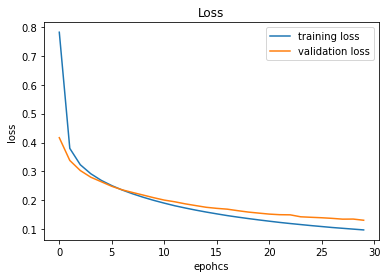

In [16]:
plt.title('Loss')
plt.xlabel('epohcs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label = 'training loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')

plt.show()

In [ ]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.plot(hist.history['accuracy'], label = 'training accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')
plt.legend(loc = 'best')